# Palmer Penguins

This notebook contains my analysis of the famous [Palmer penguins data set](https://allisonhorst.github.io/palmerpenguins/).

Data were collected between 2007 and 2009, and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and [the Palmer Station, Antarctica LTER](https://en.wikipedia.org/wiki/Palmer_Station), a member of [the Long Term Ecological Research Network](https://lternet.edu/).

![Palmer_Station](https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/PalmerFromGlaciar.JPG/320px-PalmerFromGlaciar.JPG)

***
#### What are they like, penguins?

##### Description: 

- [**Gentoo penguin**](https://en.wikipedia.org/wiki/Gentoo_penguin)

![image_gentoo](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg/320px-Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg)

- [**Adélie penguin**](https://en.wikipedia.org/wiki/Ad%C3%A9lie_penguin)

![image_Adélie](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg/346px-Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg)

- [**Chinstrap penguin**](https://en.wikipedia.org/wiki/Chinstrap_penguin)

![image_Chinstrap](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg/320px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg)

***

### What is the Palmer Penguins data set?

This is a data set of 344 individuals of three species of penguins living on three islands that were monitored, observed and measured from 2007 to 2009.

#### Components of data set:
- species (Adelie, Chinstrap, Gentoo)
- island (Torgersen, Biscoe, Dream)
- bill length in mm
- bill depth in mm
- flipper length in mm
- body mass in g
- sex

***

### Data analysis Python libraries required: 
 - Pandas - to read, manipulate, calculate data, review data types 
 - Numpy - to calculate data
 - Matplotlib.pyplot - to create plots 
 - Seaborn - to visualise rezults of analysis 

In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


*** 
### Load the penguins data set and view the first and last five rows.

In [2]:
# Load the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv") 

In [3]:
# Let's have a look. 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Get general information about the data set to have an idea of the size and content of it.

In [4]:
# Look at the first row. 
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [5]:
# Sex of penguins. 
df["sex"]

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [6]:
# Count the number of penguins of each sex. 
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [7]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
# Сheck how many missing values there are in the data set.
NaN = df.isnull().sum()
print(NaN)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


***
### Overview of types of variables in the data set.


##### **Run info() to get technical information about data set:** 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


1. The first outcome confirms that this is DataFrame.
2. There are 344 entries, i.e. 344 rows.
3. Each row has a row index with values ranging from 0 to 343.
4. The table has 7 columns. The columns species, island have a value for each of the rows (all 344 values are non-null). The columns bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g,  sex do have missing values and less than 344 non-null values.
5. The columns species, island, sex contain string type data (object). The other columns contain float type data (float64).
6. dtypes displays the sum of columns for each data type(float64(4), object(3)). 
7. The approximate amount of RAM used to hold the DataFrame is provided as well.



As shown, four columns contain floating point numerical data of different penguin measurements. If we summarize them by collumn, we can see that in the total amounts in the two columns flipper_length_mm and body_mass_g, the value after the decimal point is 0.  We can assume that the values are also have 0 after the decimal point in each individual row and check this. 

In [10]:
# Summarise by column. 

df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].sum()

bill_length_mm         15021.3
bill_depth_mm           5865.7
flipper_length_mm      68713.0
body_mass_g          1437000.0
dtype: float64

This can be checked by comparing the totals when converting the values to an integer, thus discarding the fractional part.  First, we need to replace the NaN values with 0, for convenience and correct calculation, and then use the sum function from the Numpy library.  As we can see from the calculations, the total sums of floating point values and integer values are identical.  This means that the fractional part is not reflected in any way in the total amount, that is, for each individual value it is equal to 0. 

In [11]:
# Fill the values NaN with 0.
df1=df[["flipper_length_mm","body_mass_g"]].fillna(0)
df1

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,0.0,0.0
4,193.0,3450.0
...,...,...
339,0.0,0.0
340,215.0,4850.0
341,222.0,5750.0
342,212.0,5200.0


In [12]:
# Use Numpy to convert float values to integers and get a total summ of each two checking columns. 
Body = np.array(df1["body_mass_g"],dtype=int).sum()
Flipper = np.array(df1["flipper_length_mm"],dtype=int).sum()
print (f" body_mass_g  ",Body,"\n","flipper_length_mm ",Flipper)

 body_mass_g   1437000 
 flipper_length_mm  68713


We can also check each row of the columns in question for the presence of a zero after the decimal point.   

In [13]:
# Compare the remainder of the division with zero for each row of the column flipper_length_mm. 
flipper_zero = all(df1['flipper_length_mm'] % 1 == 0)
print("Presence of a zero after decimal point in column 'flipper_length_mm' is ", flipper_zero)

Presence of a zero after decimal point in column 'flipper_length_mm' is  True


In [14]:
# Compare the remainder of the division with zero for each row of the column body_mass_g. 
body_mass_zero = all(df1['body_mass_g'] % 1 == 0)
print("Presence of a zero after decimal point in column 'body_mass_g' is ", body_mass_zero)

Presence of a zero after decimal point in column 'body_mass_g' is  True


Based on the above, it can be suggested to use the integer data type for these columns. Since integers in Python usually require less memory to store than fractional numbers, this may be a reasonable solution. The advantage of using integers is greater accuracy, faster performance, and integers are easier to manipulate for comparative analyses.

***
### Data visualisation.

First, let's recall what columns are in the dataset.

In [15]:
# The column labels.

df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

It is curious to know how the penguin species are distributed across each island. 


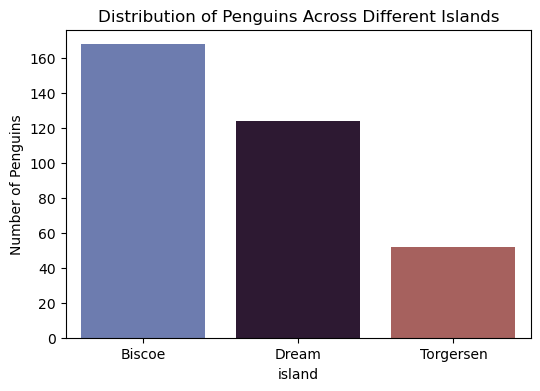

In [19]:
# Count the number of penguins on each island.

island_counts = df['island'].value_counts() 

# Create a bar plot using seaborn.

plt.figure(figsize=(6, 4))
sns.barplot(x=island_counts.index, y=island_counts.values, palette="twilight")
plt.title('Distribution of Penguins Across Different Islands')
plt.ylabel('Number of Penguins')
plt.show()

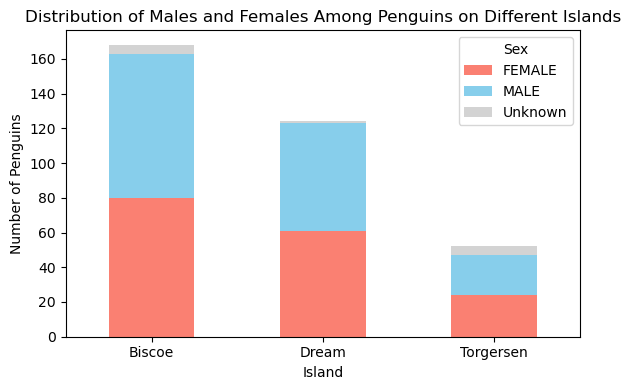

In [17]:
# Fill NaN values in the 'sex' column with a placeholder value, such as 'Unknown'
df['sex'].fillna('Unknown', inplace=True)

# Filter the DataFrame by sex and count the number of penguins on each island for each sex
sex_counts = df.groupby(['island', 'sex']).size().unstack(fill_value=0)

# Define colors for males, females, and unknown
colors = {'MALE': 'skyblue', 'FEMALE': 'salmon', 'Unknown': 'lightgray'}

# Create a bar plot using seaborn
sex_counts.plot(kind='bar', stacked=True, figsize=(6, 4), color=colors)

# Set plot labels and title
plt.title('Distribution of Males and Females Among Penguins on Different Islands')
plt.xlabel('Island')
plt.ylabel('Number of Penguins')

# Show the plot
plt.legend(title='Sex')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

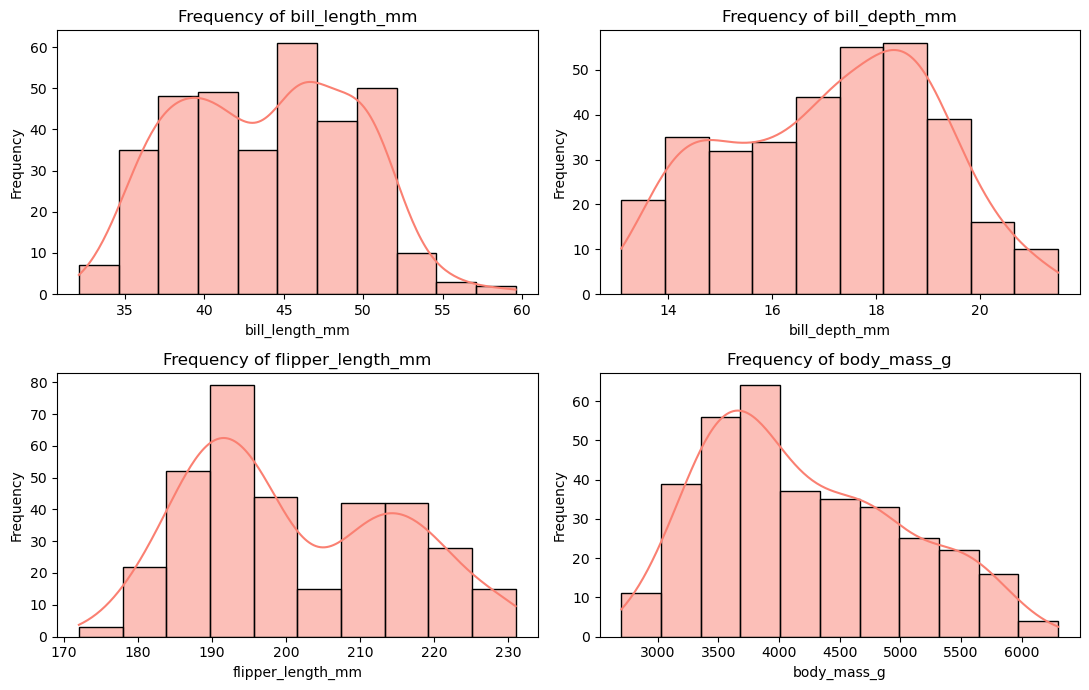

In [18]:
# Select four variables
variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a grid of histograms
fig, axes = plt.subplots(2, 2, figsize=(11, 7))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(data=df, x=var, kde=True, ax=axes[i], color='salmon')
    axes[i].set_title(f'Frequency of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

***

### END 